In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
df = pd.read_csv("full_df.csv")

In [352]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [354]:
df = df[['Patient Age', 'Patient Sex', 'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'labels', 'filename']]

In [355]:
df.loc[:, "Patient Sex"] = df["Patient Sex"].replace({
    "Male": 0,
    "Female" : 1
})

/tmp/ipykernel_8991/3418693434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "Patient Sex"] = df["Patient Sex"].replace({


In [356]:
threshold = 100  # Define minimum number of cases required
disease_counts = df["Left-Diagnostic Keywords"].value_counts()

# Find diseases that occur less than the threshold
rare_diseases = disease_counts[disease_counts < threshold].index

In [357]:
df = df[~df["Left-Diagnostic Keywords"].isin(rare_diseases)]
df

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,69,1,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],0_right.jpg
1,57,0,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],1_right.jpg
4,50,1,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],5_right.jpg
6,60,1,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],7_right.jpg
7,59,0,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],8_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,58,0,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['N'],4683_left.jpg
6387,63,0,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,['D'],4686_left.jpg
6388,42,0,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],4688_left.jpg
6389,54,0,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],4689_left.jpg


In [358]:
df["Left-Diagnostic Keywords"].value_counts()

Left-Diagnostic Keywords
normal fundus                             2796
moderate non proliferative retinopathy     717
mild nonproliferative retinopathy          428
cataract                                   268
pathological myopia                        208
glaucoma                                   207
dry age-related macular degeneration       184
severe nonproliferative retinopathy        139
drusen                                     130
epiretinal membrane                        106
hypertensive retinopathy                   106
Name: count, dtype: int64

In [359]:
threshold = 100  # Define minimum number of cases required
disease_counts = df["Right-Diagnostic Keywords"].value_counts()

# Find diseases that occur less than the threshold
rare_diseases = disease_counts[disease_counts < threshold].index

In [360]:
df = df[~df["Right-Diagnostic Keywords"].isin(rare_diseases)]
df

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,69,1,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],0_right.jpg
1,57,0,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],1_right.jpg
4,50,1,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],5_right.jpg
6,60,1,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],7_right.jpg
7,59,0,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],8_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,45,0,mild nonproliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],4682_left.jpg
6386,58,0,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['N'],4683_left.jpg
6388,42,0,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],4688_left.jpg
6389,54,0,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],4689_left.jpg


In [361]:
df["Right-Diagnostic Keywords"].value_counts()

Right-Diagnostic Keywords
normal fundus                             2352
moderate non proliferative retinopathy     646
mild nonproliferative retinopathy          412
cataract                                   224
pathological myopia                        190
glaucoma                                   174
dry age-related macular degeneration       172
severe nonproliferative retinopathy        138
drusen                                     122
macular epiretinal membrane                120
Name: count, dtype: int64

In [362]:
df

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,69,1,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],0_right.jpg
1,57,0,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],1_right.jpg
4,50,1,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],5_right.jpg
6,60,1,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],7_right.jpg
7,59,0,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],8_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,45,0,mild nonproliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],4682_left.jpg
6386,58,0,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['N'],4683_left.jpg
6388,42,0,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],4688_left.jpg
6389,54,0,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],4689_left.jpg


In [363]:
Left_Diagnostic_Keywords = {
'cataract' : 0 ,
 'drusen' : 1 ,
 'dry age-related macular degeneration' : 2 ,
 'epiretinal membrane' : 3 ,
 'glaucoma' : 4 ,
 'hypertensive retinopathy' : 5 ,
 'mild nonproliferative retinopathy' : 6 ,
 'moderate non proliferative retinopathy' : 7,
 'normal fundus' : 8,
 'pathological myopia' : 9,
 'severe nonproliferative retinopathy' : 10
}
df.loc[:, "Left-Diagnostic Keywords"] = df["Left-Diagnostic Keywords"].replace(Left_Diagnostic_Keywords)

/tmp/ipykernel_8991/418118102.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "Left-Diagnostic Keywords"] = df["Left-Diagnostic Keywords"].replace(Left_Diagnostic_Keywords)


In [364]:
sorted(df["Right-Diagnostic Keywords"].unique())

['cataract',
 'drusen',
 'dry age-related macular degeneration',
 'glaucoma',
 'macular epiretinal membrane',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'normal fundus',
 'pathological myopia',
 'severe nonproliferative retinopathy']

In [365]:
Right_Diagnostic_Keywords = {
'cataract' : 0 ,
 'drusen' : 1 ,
 'dry age-related macular degeneration' : 2 ,
 'glaucoma' : 3 ,
 'macular epiretinal membrane' : 4,
 'mild nonproliferative retinopathy' : 5 ,
 'moderate non proliferative retinopathy' : 6,
 'normal fundus' : 7,
 'pathological myopia' : 8,
 'severe nonproliferative retinopathy' : 9
}
df.loc[:, "Right-Diagnostic Keywords"] = df["Right-Diagnostic Keywords"].replace(Right_Diagnostic_Keywords)

/tmp/ipykernel_8991/904189215.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "Right-Diagnostic Keywords"] = df["Right-Diagnostic Keywords"].replace(Right_Diagnostic_Keywords)


In [366]:
df

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,69,1,0,7,0,0,0,1,0,0,0,0,['N'],0_right.jpg
1,57,0,8,7,1,0,0,0,0,0,0,0,['N'],1_right.jpg
4,50,1,7,6,0,1,0,0,0,0,0,0,['D'],5_right.jpg
6,60,1,1,5,0,1,0,0,0,0,0,1,['D'],7_right.jpg
7,59,0,8,7,1,0,0,0,0,0,0,0,['N'],8_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,45,0,6,6,0,1,0,0,0,0,0,0,['D'],4682_left.jpg
6386,58,0,8,5,0,1,0,0,0,0,0,0,['N'],4683_left.jpg
6388,42,0,7,6,0,1,0,0,0,0,0,0,['D'],4688_left.jpg
6389,54,0,6,7,0,1,0,0,0,0,0,0,['D'],4689_left.jpg


In [367]:



labels = {
    "N": 0,
    "D": 1,
    "G": 2,
    "C": 3,
    "A": 4,
    "H": 5,
    "M": 6,
    "O": 7
}

df.loc[:, "labels"] = df["labels"].str.strip("[]").str.replace("'", "")
df.loc[:, "labels"] = df["labels"].replace(labels)


/tmp/ipykernel_8991/1401399232.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "labels"] = df["labels"].replace(labels)


In [368]:
df

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,69,1,0,7,0,0,0,1,0,0,0,0,0,0_right.jpg
1,57,0,8,7,1,0,0,0,0,0,0,0,0,1_right.jpg
4,50,1,7,6,0,1,0,0,0,0,0,0,1,5_right.jpg
6,60,1,1,5,0,1,0,0,0,0,0,1,1,7_right.jpg
7,59,0,8,7,1,0,0,0,0,0,0,0,0,8_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,45,0,6,6,0,1,0,0,0,0,0,0,1,4682_left.jpg
6386,58,0,8,5,0,1,0,0,0,0,0,0,0,4683_left.jpg
6388,42,0,7,6,0,1,0,0,0,0,0,0,1,4688_left.jpg
6389,54,0,6,7,0,1,0,0,0,0,0,0,1,4689_left.jpg


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 6390
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Age                4550 non-null   int64 
 1   Patient Sex                4550 non-null   object
 2   Left-Diagnostic Keywords   4550 non-null   object
 3   Right-Diagnostic Keywords  4550 non-null   object
 4   N                          4550 non-null   int64 
 5   D                          4550 non-null   int64 
 6   G                          4550 non-null   int64 
 7   C                          4550 non-null   int64 
 8   A                          4550 non-null   int64 
 9   H                          4550 non-null   int64 
 10  M                          4550 non-null   int64 
 11  O                          4550 non-null   int64 
 12  labels                     4550 non-null   object
 13  filename                   4550 non-null   object
dtypes: int64(9), 

In [370]:
df["Patient Sex"] = df["Patient Sex"].astype("int64")
df["Right-Diagnostic Keywords"] = df["Right-Diagnostic Keywords"].astype("int64")
df["Left-Diagnostic Keywords"] = df["Left-Diagnostic Keywords"].astype("int64")
df["labels"] = df["labels"].astype("int64")

/tmp/ipykernel_8991/4160889375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Patient Sex"] = df["Patient Sex"].astype("int64")
/tmp/ipykernel_8991/4160889375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Right-Diagnostic Keywords"] = df["Right-Diagnostic Keywords"].astype("int64")
/tmp/ipykernel_8991/4160889375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 6390
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Age                4550 non-null   int64 
 1   Patient Sex                4550 non-null   int64 
 2   Left-Diagnostic Keywords   4550 non-null   int64 
 3   Right-Diagnostic Keywords  4550 non-null   int64 
 4   N                          4550 non-null   int64 
 5   D                          4550 non-null   int64 
 6   G                          4550 non-null   int64 
 7   C                          4550 non-null   int64 
 8   A                          4550 non-null   int64 
 9   H                          4550 non-null   int64 
 10  M                          4550 non-null   int64 
 11  O                          4550 non-null   int64 
 12  labels                     4550 non-null   int64 
 13  filename                   4550 non-null   object
dtypes: int64(13),

In [372]:
df["filename"] = df["filename"].apply(lambda x: f"preprocessed_images/{x}") 

/tmp/ipykernel_8991/168359467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filename"] = df["filename"].apply(lambda x: f"preprocessed_images/{x}")


In [373]:
df.filename[0]

'preprocessed_images/0_right.jpg'

In [374]:
df

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,69,1,0,7,0,0,0,1,0,0,0,0,0,preprocessed_images/0_right.jpg
1,57,0,8,7,1,0,0,0,0,0,0,0,0,preprocessed_images/1_right.jpg
4,50,1,7,6,0,1,0,0,0,0,0,0,1,preprocessed_images/5_right.jpg
6,60,1,1,5,0,1,0,0,0,0,0,1,1,preprocessed_images/7_right.jpg
7,59,0,8,7,1,0,0,0,0,0,0,0,0,preprocessed_images/8_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,45,0,6,6,0,1,0,0,0,0,0,0,1,preprocessed_images/4682_left.jpg
6386,58,0,8,5,0,1,0,0,0,0,0,0,0,preprocessed_images/4683_left.jpg
6388,42,0,7,6,0,1,0,0,0,0,0,0,1,preprocessed_images/4688_left.jpg
6389,54,0,6,7,0,1,0,0,0,0,0,0,1,preprocessed_images/4689_left.jpg


<Axes: xlabel='Patient Age', ylabel='Count'>

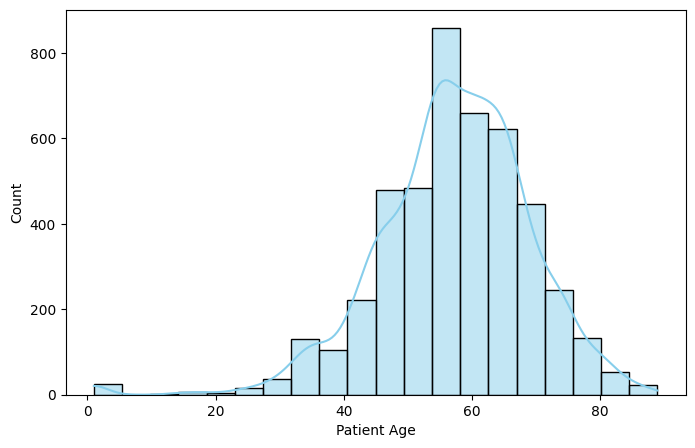

In [375]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Patient Age"], bins=20, kde=True, color="skyblue")

In [376]:
image_file = df["filename"]

In [377]:

# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# # Show plot
# plt.title("Feature Correlation Heatmap")
# plt.show()


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 6390
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Age                4550 non-null   int64 
 1   Patient Sex                4550 non-null   int64 
 2   Left-Diagnostic Keywords   4550 non-null   int64 
 3   Right-Diagnostic Keywords  4550 non-null   int64 
 4   N                          4550 non-null   int64 
 5   D                          4550 non-null   int64 
 6   G                          4550 non-null   int64 
 7   C                          4550 non-null   int64 
 8   A                          4550 non-null   int64 
 9   H                          4550 non-null   int64 
 10  M                          4550 non-null   int64 
 11  O                          4550 non-null   int64 
 12  labels                     4550 non-null   int64 
 13  filename                   4550 non-null   object
dtypes: int64(13),

In [379]:
df

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,69,1,0,7,0,0,0,1,0,0,0,0,0,preprocessed_images/0_right.jpg
1,57,0,8,7,1,0,0,0,0,0,0,0,0,preprocessed_images/1_right.jpg
4,50,1,7,6,0,1,0,0,0,0,0,0,1,preprocessed_images/5_right.jpg
6,60,1,1,5,0,1,0,0,0,0,0,1,1,preprocessed_images/7_right.jpg
7,59,0,8,7,1,0,0,0,0,0,0,0,0,preprocessed_images/8_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,45,0,6,6,0,1,0,0,0,0,0,0,1,preprocessed_images/4682_left.jpg
6386,58,0,8,5,0,1,0,0,0,0,0,0,0,preprocessed_images/4683_left.jpg
6388,42,0,7,6,0,1,0,0,0,0,0,0,1,preprocessed_images/4688_left.jpg
6389,54,0,6,7,0,1,0,0,0,0,0,0,1,preprocessed_images/4689_left.jpg


In [380]:
X = df.loc[:, ~df.columns.isin(["labels","filename"])]

In [381]:
Y = df["labels"]

In [382]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.25, random_state=33)

In [383]:
X_train.shape

(3412, 12)

In [384]:
y_train

6353    1
2165    0
2543    0
5396    0
3386    0
       ..
157     7
5024    0
4326    2
1340    2
3638    7
Name: labels, Length: 3412, dtype: int64

In [385]:
X_train

,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
6353,64,1,7,5,0,1,0,0,0,0,0,0
2165,53,0,8,7,1,0,0,0,0,0,0,0
2543,59,0,8,7,1,0,0,0,0,0,0,0
5396,60,1,8,7,1,0,0,0,0,0,0,0
3386,50,0,8,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
157,63,1,1,1,0,0,0,0,0,0,0,1
5024,67,1,8,7,1,0,0,0,0,0,0,0
4326,50,0,4,7,0,0,1,0,0,0,0,0
1340,57,1,7,3,0,1,1,0,0,0,0,0


In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8936731107205624
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       593
           1       0.84      0.99      0.91       292
           2       0.86      0.96      0.91        51
           3       0.85      0.75      0.80        61
           4       1.00      0.93      0.97        46
           6       0.91      0.92      0.91        52
           7       0.63      0.72      0.67        43

    accuracy                           0.89      1138
   macro avg       0.86      0.88      0.87      1138
weighted avg       0.90      0.89      0.89      1138



/home/jonah/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [387]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8374340949033392
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       593
           1       0.84      0.85      0.84       292
           2       0.85      0.86      0.85        51
           3       0.78      0.64      0.70        61
           4       0.98      0.91      0.94        46
           6       0.90      0.83      0.86        52
           7       0.45      0.51      0.48        43

    accuracy                           0.84      1138
   macro avg       0.81      0.78      0.79      1138
weighted avg       0.84      0.84      0.84      1138



In [388]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.8910369068541301
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       593
           1       0.83      0.99      0.90       292
           2       0.82      1.00      0.90        51
           3       0.90      0.70      0.79        61
           4       1.00      0.93      0.97        46
           6       0.89      0.92      0.91        52
           7       0.57      0.98      0.72        43

    accuracy                           0.89      1138
   macro avg       0.85      0.91      0.87      1138
weighted avg       0.91      0.89      0.89      1138



In [389]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Accuracy: 0.8936731107205624
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       593
           1       0.83      1.00      0.91       292
           2       0.83      0.94      0.88        51
           3       0.82      0.84      0.83        61
           4       1.00      0.96      0.98        46
           6       0.89      0.92      0.91        52
           7       0.58      0.98      0.73        43

    accuracy                           0.89      1138
   macro avg       0.85      0.92      0.88      1138
weighted avg       0.91      0.89      0.90      1138



In [390]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.9015817223198594
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       593
           1       0.85      0.98      0.91       292
           2       0.82      1.00      0.90        51
           3       0.78      1.00      0.88        61
           4       1.00      0.98      0.99        46
           6       0.91      0.98      0.94        52
           7       0.59      0.98      0.74        43

    accuracy                           0.90      1138
   macro avg       0.85      0.96      0.90      1138
weighted avg       0.92      0.90      0.90      1138



In [391]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Accuracy: 0.8400702987697716
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       593
           1       0.92      0.82      0.86       292
           2       0.82      1.00      0.90        51
           3       0.90      0.70      0.79        61
           4       1.00      0.98      0.99        46
           6       0.00      0.00      0.00        52
           7       0.34      1.00      0.50        43

    accuracy                           0.84      1138
   macro avg       0.70      0.77      0.71      1138
weighted avg       0.84      0.84      0.83      1138



/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [392]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.8471001757469244
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       593
           1       0.84      0.98      0.90       292
           2       0.82      1.00      0.90        51
           3       0.78      1.00      0.88        61
           4       1.00      0.98      0.99        46
           6       0.00      0.00      0.00        52
           7       0.00      0.00      0.00        43

    accuracy                           0.85      1138
   macro avg       0.61      0.69      0.65      1138
weighted avg       0.78      0.85      0.81      1138



/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [393]:
import pickle
pickle.dump(nb, open('model.pkl', 'wb'))

In [394]:

def load_model():
    with open("model.pkl", "rb") as file:
        return pickle.load(file) 

model = load_model()

In [395]:
sample_input = np.array([[64, 1, 7, 5, 0, 1, 0, 0, 0, 0, 0,0]])  

# Make a prediction
prediction = model.predict(sample_input)
print("Predicted Output:", prediction)

Predicted Output: [1]


/home/jonah/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [396]:
df = df[['labels', 'filename']]

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 6390
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    4550 non-null   int64 
 1   filename  4550 non-null   object
dtypes: int64(1), object(1)
memory usage: 235.7+ KB


In [398]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [399]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [400]:
df.loc[:,"labels"] = df["labels"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 6390
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    4550 non-null   object
 1   filename  4550 non-null   object
dtypes: object(2)
memory usage: 235.7+ KB


/tmp/ipykernel_8991/2581148348.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '1' ... '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,"labels"] = df["labels"].astype(str)


In [403]:
train_generator = train_datagen.flow_from_dataframe(
      dataframe=df,
      x_col="filename",   # This must contain valid image paths (strings)
      y_col="labels",  # Labels must be strings
      target_size=(150, 150),
      batch_size=32,
      class_mode='categorical',  # Since labels are 0 and 1
      subset='training'
  )

validation_generator = train_datagen.flow_from_dataframe(
      dataframe=df,
      x_col="filename",   # This must contain valid image paths (strings)
      y_col="labels",  # Labels must be strings
      target_size=(150, 150),
      batch_size=32,
      class_mode='categorical',  # Since labels are 0 and 1
      subset='validation'
  )

Found 3640 validated image filenames belonging to 8 classes.
Found 910 validated image filenames belonging to 8 classes.


In [406]:
train_generator.image_shape

(150, 150, 3)

In [404]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [409]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

# Get the number of classes
num_classes = len(train_generator.class_indices)  # Auto-detect the number of classes

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(loss='categorical_crossentropy',  # For multi-class classification
              optimizer='adam',
              metrics=['accuracy'])

# Calculate the steps per epoch
train_steps_per_epoch = int(np.ceil(train_generator.samples / train_generator.batch_size))
validation_steps_per_epoch = int(np.ceil(validation_generator.samples / validation_generator.batch_size))

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch,
    verbose=1
)


Epoch 1/15


I0000 00:00:1741327796.919148   11882 service.cc:148] XLA service 0x746270004860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741327796.920091   11882 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-03-07 11:39:57.020828: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741327797.460912   11882 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-07 11:39:58.210645: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"act

  2/114 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.1719 - loss: 2.3307  

I0000 00:00:1741327803.116118   11882 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 66/114 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.4807 - loss: 1.5235

2025-03-07 11:40:12.913805: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 11:40:13.026199: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,64,72,72]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,32,74,74]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5102 - loss: 1.4111

/home/jonah/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-03-07 11:40:24.908062: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 11

114/114 ━━━━━━━━━━━━━━━━━━━━ 38s 248ms/step - accuracy: 0.5106 - loss: 1.4095 - val_accuracy: 0.3538 - val_loss: 2.4381
Epoch 2/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - accuracy: 0.5788 - loss: 1.1070 - val_accuracy: 0.3549 - val_loss: 2.6727
Epoch 3/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.5646 - loss: 1.0495 - val_accuracy: 0.3209 - val_loss: 2.4042
Epoch 4/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.5878 - loss: 1.0054 - val_accuracy: 0.3758 - val_loss: 2.3811
Epoch 5/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.5916 - loss: 0.9804 - val_accuracy: 0.3692 - val_loss: 2.2434
Epoch 6/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - accuracy: 0.5996 - loss: 0.9687 - val_accuracy: 0.3835 - val_loss: 2.2977
Epoch 7/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - accuracy: 0.5932 - loss: 0.9588 - val_accuracy: 0.3571 - val_loss: 2.6735
Epoch 8/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.6175 - loss: 0.9157 - val

In [411]:
model.save('model.h5')

In [413]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("model.h5")  # Ensure your trained model is saved as 'model.h5'

# Define label mapping
labels = {
    0: "Normal (N)",
    1: "Diabetes (D)",
    2: "Glaucoma (G)",
    3: "Cataract (C)",
    4: "Age-related Macular Degeneration (A)",
    5: "Hypertension (H)",
    6: "Pathological Myopia (M)",
    7: "Other diseases/abnormalities (O)"
}

def preprocess_image(img_path):
    """Preprocesses an image for model prediction."""
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch
    img_array /= 255.0  # Normalize
    return img_array

def predict_disease(img_path):
    """Predicts the disease in the given image."""
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    
    predicted_label = np.argmax(prediction[0])  # Get class with highest probability
    disease_name = labels[predicted_label]  # Map label to disease name
    
    print(f"Predicted Disease: {disease_name}")

# Example usage
image_path = "preprocessed_images/100_left.jpg"  # Replace with the actual image path
predict_disease(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
Predicted Disease: Diabetes (D)
